MNIST

DataLoader, Transformation

Multilayer Neural Net, activation func

Loss and optimizer

Training loop (in-batch)

model evaluation

GPU support

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
input_size = 784 # images are 28x28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [3]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [5]:
examples = iter(train_loader)
samples, labels = next(examples)
samples.shape, labels.shape
# 100 images, only one color channel, resolution 28x28

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

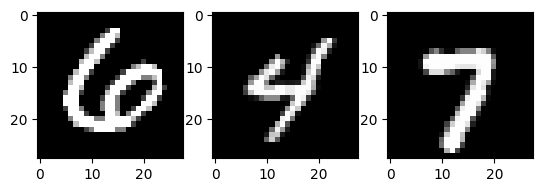

In [6]:
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
    # plt.show()

In [7]:
class net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(net,self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    # no softmax, because the loss_function do it for us
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        return x

In [8]:
model = net(input_size, hidden_size, num_classes)
model = model.to(device)

In [9]:
# loss function & optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [10]:
# training loop
n_total_step = len(train_loader)


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # reshape from (100, 1, 28, 28) to (100, 784)
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward pass
        pred = model(images)
        loss = criterion(pred, labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'eopch {epoch+1} / {num_epochs}, step {i+1} / {n_total_step}, loss = {loss.item():.4f}')

eopch 1 / 2, step 100 / 600, loss = 0.2466
eopch 1 / 2, step 200 / 600, loss = 0.1958
eopch 1 / 2, step 300 / 600, loss = 0.1345
eopch 1 / 2, step 400 / 600, loss = 0.1158
eopch 1 / 2, step 500 / 600, loss = 0.2807
eopch 1 / 2, step 600 / 600, loss = 0.1450
eopch 2 / 2, step 100 / 600, loss = 0.0996
eopch 2 / 2, step 200 / 600, loss = 0.0711
eopch 2 / 2, step 300 / 600, loss = 0.1276
eopch 2 / 2, step 400 / 600, loss = 0.0956
eopch 2 / 2, step 500 / 600, loss = 0.1063
eopch 2 / 2, step 600 / 600, loss = 0.0249


In [11]:
# test

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        output = model(images)

        _, pred = torch.max(output, 1)
        n_samples += labels.shape[0]
        n_correct += (pred == labels).sum().item()

In [12]:
acc = 100.0 * n_correct / n_samples
acc

97.01

In [13]:
output[:5]

tensor([[ -2.1896,  -3.0678,  -2.1904,  -1.2334,  -2.2339,  -1.5244,  -2.0169,
          -7.5558,   5.0661,  -5.8920],
        [ -6.1538, -10.1403,  -7.0969,  -1.9766,   3.1817,  -4.7264,  -8.6740,
          -2.2810,   0.7073,   4.9280],
        [  6.7268,  -6.1161,  -0.0395,  -3.1222,  -2.6887,  -1.9964,  -2.1773,
          -3.0343,  -2.5458,  -2.6893],
        [ -7.1619,   4.9434,  -3.0896,  -3.2618,   0.5086,  -7.5520,  -5.8193,
           0.6869,  -1.6224,  -4.9237],
        [  1.2925,  -5.5986,   1.7396,  -0.0962,  -3.1651,  -0.7645,  -2.1003,
          -2.7630,  -2.3324,  -6.8397]], device='cuda:0')